# What is Time Series?
by **Professor Throckmorton**  
for *Time Series Econometrics*  
W&amp;M ECON 408/PUBP 616  
<a href="what-is-time-series.slides.html">Slides</a>

## Definition

- **A time series is a sequence of data points collected over time**.
- These data points are **ordered by time**, and the sequence of the data cannot be interchanged.
- **Time series analysis** focuses on transforming, visualizing, and modeling this type of data.
- When modeling a time series, its value at any time is random, i.e., the realization of a **random variable**.
- Thus, a time series is a **discrete stochastic process**.

## Plots

-   A **time series plot** (or time plot) is a graph that visualizes the evolution of a time series.
    *   Time, $t$, is on the horizontal axis.
    *   Observed values are on the vertical axis.
-   Time series plots are crucial for analysis, revealing patterns such as **trend and seasonality**.
-   The first step always is to plot the recorded data and do a visual examination, i.e., "eyeball econometrics."
-   For economic time series data, usually we have observations at regular intervals, or **frequencies**, e.g., daily, monthly, quarterly, or annual.

## Examples

- Daily:
  - [S&P 500](https://fred.stlouisfed.org/series/SP500)
  - [Bitcoin Price](https://fred.stlouisfed.org/series/CBBTCUSD)
- Monthly:
  - [U.S. Home Price Index](https://fred.stlouisfed.org/series/CSUSHPINSA)
  - [U.S. Retail Sales](https://fred.stlouisfed.org/series/MRTSSM44000USS) 
  - [U.S. Unemployment Rate](https://fred.stlouisfed.org/series/UNRATE)
- Quarterly: [U.S. Gross Domestic Product](https://fred.stlouisfed.org/series/GDP) (GDP)
- Annual: [U.S. Capital Stock](https://fred.stlouisfed.org/series/RKNANPUSA666NRUG)

In [4]:
# Libraries
from fredapi import Fred
import pandas as pd
# Read Data
fred_api_key = pd.read_csv('fred_api_key.txt', header=None)
fred = Fred(api_key=fred_api_key.iloc[0,0])
data = fred.get_series('UNRATE').to_frame(name='UR')
print(data.head(2))
print(data.tail(2))

             UR
1948-01-01  3.4
1948-02-01  3.8
             UR
2025-05-01  4.2
2025-06-01  4.1


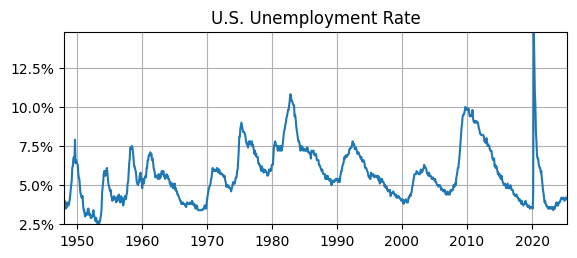

In [5]:
# Plotting
import matplotlib.pyplot as plt
# Plot
fig, ax = plt.subplots(figsize=(6.5,2.5));
ax.plot(data.UR);
ax.set_title('U.S. Unemployment Rate');
ax.yaxis.set_major_formatter('{x:,.1f}%')
ax.grid(); ax.autoscale(tight=True)

## Objectives
- **Time series plots** are useful for identifying
  - **trends**, i.e., long-term systematic patterns.
  - **seasons**, i.e., common patterns across years.
  - **cycles**, i.e, patterns related to economic recessions and expansions. 
  - **structural changes** to trend, seasonal, or cyclical patterns.
  - **outliers** (anomalies).
- **Descriptive statistics** are used to summarize the properties of time series, e.g., **Mean/Expected Value**, **Variance/Std. Deviation**, **Autocorrelation**, **Skewness**, **Kurtosis**, **percentiles**, and **min/max** are all useful descriptive statistics.

In [7]:
# Import libraries
#   Scientific computing, statistical functions
import scipy.stats as stats

# Mean
print(f'Most recent UR = {data.UR.iloc[-1]:.1f}%')
print(f'E(UR) = {stats.tmean(data.UR):.1f}%')
print(f'Std(UR) = {stats.tstd(data.UR):.1f}%')
print(f'Skew(UR) = {stats.skew(data.UR):.1f}')
print(f'Kurt(UR) = {stats.kurtosis(data.UR):.1f}')
print(f'min(UR) = {data.UR.min():.1f}%')
print(f'max(UR) = {data.UR.max():.1f}%')

Most recent UR = 4.1%
E(UR) = 5.7%
Std(UR) = 1.7%
Skew(UR) = 0.9
Kurt(UR) = 1.1
min(UR) = 2.5%
max(UR) = 14.8%


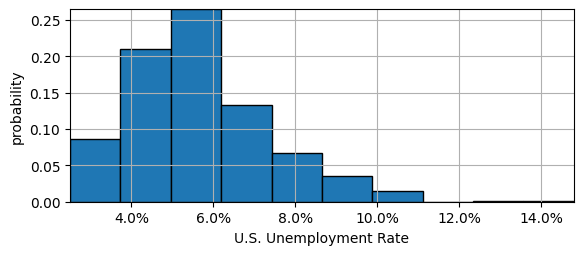

In [8]:
# Plot histogram
fig, ax = plt.subplots(figsize=(6.5,2.5));
ax.hist(data.UR,edgecolor='black',density='true')
ax.set_xlabel('U.S. Unemployment Rate');
ax.set_ylabel('probability')
ax.xaxis.set_major_formatter('{x:,.1f}%')
ax.grid(); ax.autoscale(tight=True)

- Most recent UR is $4.1\%$, or $1.6pp$ below historical mean of $5.7\%$
- Std. Dev. is $1.7\%$. If UR was normally distributed, then $\pm 2 SD$, or interval from $0.7\%$ to $9.1\%$, would contain $95\%$.
- But minimum UR is $2.5\%$ and maximum is $14.8\%$, which indicates UR is most likely skewed.
- $Skew(UR) = 0.9$ and we see that histogram has long right tail.

## Key Concepts
- **White Noise** is a special type of time series, where the values are random and uncorrelated across time.
- **Stationarity**, e.g., does the data have a trend, seasonality, or is the covariance changing over time? If no to all, then it is **stationary**.
- If the data is **non-stationary**, then the underlying probabilistic structure of the series is changing over time, and there is no way to relate the future to the past.
- A **Random Walk** is a key model for the log price of a financial asset.
- **Autocorrelation** is a measure of how values in a time series are correlated with previous values.